In [2]:
from U_vis import *

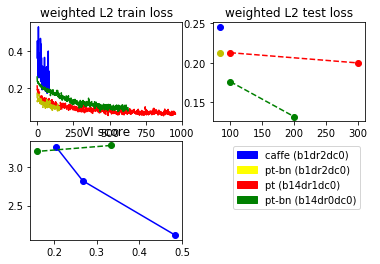

In [3]:
# 1. examine L2 training
# caffe do 0.5*MSE, train on dc2-dr0
cc2 = 2*getAvg(getLoss(0,'keras_train/caffe_l2.log'),120)
# train on dc2-dr0
ppB2 = getAvg(getLoss(1,'../lib/malis-pytorch/result/14_6_1e-3_bn_dc0_dr0_init0/log_L2_0.001.txt'),10)
# train on dc1-dr0
pp2 = getAvg(getLoss(1,'../lib/malis-pytorch/result/14_7_1e-3_dc1_dr0/log_L2_0.001_2.0.txt'),10)
pp2b1 = getAvg(getLoss(1,'../lib/malis-pytorch/result/1_1_1e-4_dc2_dr0/log_L2_0.0001_2.0.txt'),120)

plt.subplot(2,2,1)
plt.plot(cc2,'b-',pp2,'r--',ppB2,'g--',pp2b1,'y--')
plt.title('weighted L2 train loss')


tc=[np.array([10000]),np.array([35.552113390840056])]
tpb1=[np.array([10000]),np.array([30.772950946657453])]
tpB=[np.array([12000,24000]),np.array([25.547519345919405,19.155324783124538])]
tp=[np.array([12000,36000]),np.array([30.834087369197391, 28.967864104816467])]
plt.subplot(2,2,2)

plt.plot(tc[0]/120.0,tc[1]/145,'b-o',
         tpb1[0]/120.0,tpb1[1]/145,'y-o',
         tp[0]/120.0,tp[1]/145,'r--o',
         tpB[0]/120.0,tpB[1]/145,'g--o')
plt.title('weighted L2 test loss')


vc=np.zeros((3,2))
vc[0]=[0.2046,3.2573]
vc[1]=[0.2667638,2.822568]
vc[2]=[0.48491877,2.1145]
vpB=np.zeros((2,2))
vpB[0]=[0.332925274058,3.28005318425]
vpB[1]=[0.159595581651,3.20277047222]

plt.subplot(2,2,3)
plt.plot(vc[:,0],vc[:,1],'b-o',
         vpB[:,0],vpB[:,1],'g--o')
plt.title('VI score')



import matplotlib.patches as mpatches
plt.subplot(2,2,4)
pb = mpatches.Patch(color='blue', label='caffe (b1dr2dc0)')
pr = mpatches.Patch(color='red', label='pt (b14dr1dc0)')
pg = mpatches.Patch(color='green', label='pt-bn (b14dr0dc0)')
py = mpatches.Patch(color='yellow', label='pt-bn (b1dr2dc0)')
plt.legend(handles=[pb,py,pr,pg])
plt.axis('off')

plt.show()

In [41]:
tc[1]

array([ 35.55211339])

In [27]:
np.median(cc2[-100:])

0.13062839999999998

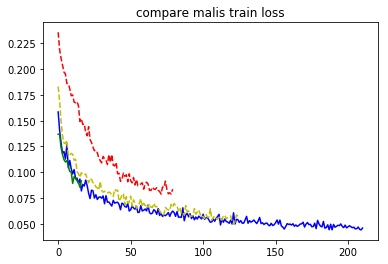

In [7]:
cc = getAvg(getLoss(0,'keras_train/caffe_malis.log'),1200)

#p = getAvg(getLoss(1,'../lib/malis-pytorch/result/14_6_1e-3_bn_dc0_dr0_init0/log_malis_0.001iter_14_2000_0.001.txt'),100)
pp = getAvg(getLoss(1,'../lib/malis-pytorch/result/10_5_1e-3_dc2_dr0_bn/log_malis_0.0005_0.5net_weight_24_10k_bn.txt'),120)
pp2 = getAvg(getLoss(1,'../lib/malis-pytorch/result/10_5_1e-3_dc2_dr0/log_malis_0.0005_0.5net_weight_24_10k.txt'),120)
pp3 = getAvg(getLoss(1,'../lib/malis-pytorch/result/1_1_1e-4_dc2_dr0/log_malis_5e-05_0.5net_weight_24_10k.txt'),1200)

plt.plot(cc,'b-',pp,'r--',pp2,'y--',pp3,'g-')
plt.title('compare malis train loss')
plt.show()

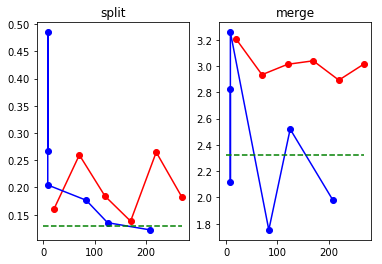

In [10]:
# load vi result
xs=np.array([2000,6999,11999,16999,21999,26999])
ys=np.zeros((len(xs),2))

xc=[x*1000/1200.0 for x in [10,10,10,100,150,250]]
yc=np.zeros((6,2))
yc[0]=[0.2667638,2.822568]
yc[1]=[0.48491877,2.1145]
yc[2]=[0.2046,3.2573]
yc[3]=[0.176581948624,1.75310578072]
yc[4]=[0.135401978999,2.52013621803]
yc[5]=[0.122118250534,1.98003994537]

ref=[0.13,2.32]
for i,x in enumerate(xs):
    ys[i]=getVI('../fgonda/vi_result/result/14_6_1e-3_bn_dc0_dr0_init0/compare-'+str(x)+'_watershed_40000.txt')

tt=['split','merge']
for i in range(2):
    plt.subplot(1,2,1+i)
    plt.plot(xs*0.01,ys[:,i],'r-o',xc,yc[:,i],'b-o',[0,xs[-1]*0.01],[ref[i]]*2,'g--')
    plt.title(tt[i])
plt.show()

In [7]:
# visualize segmentation
import h5py
import numpy as np
D0='../fgonda/vi_result/result/14_6_1e-3_bn_dc0_dr0_init0/'
D1='data/ecs-3d/ecs-gt-4x6x6/'

zid=50
im = np.transpose(np.tile(np.array(h5py.File(D1+'im_uint8.h5')['main'])[zid+14,44:-44,44:-44],
                          (3,1,1)),(2,1,0))
seg = np.transpose(np.array(h5py.File(D0+'ecs-gt-4x6x6-11999-combo2-watershed_40000.h5')['stack'])[zid,:,:],
                   (1,0))

D2='../fgonda/vi_result/output/affinity_24_3/250000/'
seg2 = np.transpose(np.array(h5py.File(D2+'ecs-gt-4x6x6-combo2-watershed_40000.h5')['stack'])[zid,:,:],
                   (1,0))


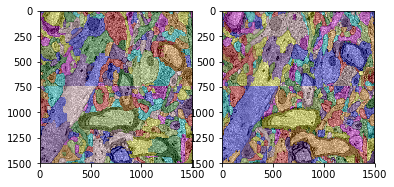

In [8]:
from skimage.color import label2rgb
out = label2rgb(seg,image=im)
out2 = label2rgb(seg2,image=im)
plt.subplot(1,2,1)
plt.imshow(out)
plt.subplot(1,2,2)
plt.imshow(out2)
plt.show()

In [43]:
h5py.File(D1+'im_uint8.h5')['main']

<HDF5 dataset "main": shape (173, 1584, 1584), type "|u1">